In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# 准备数据
# 读取数据，指定分隔符为“,”
xy = np.loadtxt("diabetes.csv", delimiter=",", dtype=np.float32)
# x_data数据为前n-1列
x_data = torch.from_numpy(xy[:, :-1])
# y_data数据为最后一列
y_data = torch.from_numpy(xy[:, [-1]])

In [3]:
# 定义一个多输入模型的类
class Model(torch.nn.Module):
    # 初始化对象
    def __init__(self):
        # 调用父类的构造函数
        super(Model, self).__init__()
        # 构造一个线性回归的对象
        # https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=torch+nn+linear#torch.nn.Linear
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()

    # 前馈计算
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x


model = Model()

In [4]:
# 定义损失函数
criterion = torch.nn.BCELoss(reduction='mean')
# 定义优化器，lr是学习率
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

0 0.7422772645950317
1 0.732172429561615
2 0.7231608033180237
3 0.7151204347610474
4 0.7079431414604187
5 0.701532781124115
6 0.6958041787147522
7 0.6906816363334656
8 0.6860983371734619
9 0.6819950342178345
10 0.678318977355957
11 0.6750237941741943
12 0.6720682978630066
13 0.6694156527519226
14 0.6670335531234741
15 0.6648932099342346
16 0.6629688739776611
17 0.661237895488739
18 0.6596799492835999
19 0.6582770943641663
20 0.6570131182670593
21 0.6558738946914673
22 0.6548464894294739
23 0.6539195775985718
24 0.6530830264091492
25 0.6523275971412659
26 0.6516451835632324
27 0.651028573513031
28 0.6504710912704468
29 0.6499670147895813
30 0.6495109796524048
31 0.6490982174873352
32 0.6487246751785278
33 0.6483864188194275
34 0.6480801105499268
35 0.647802472114563
36 0.6475510001182556
37 0.647322952747345
38 0.6471163034439087
39 0.6469286680221558
40 0.6467586755752563
41 0.6466042995452881
42 0.6464642882347107
43 0.6463371515274048
44 0.6462217569351196
45 0.6461169719696045
46 0.

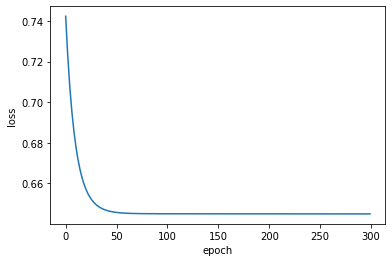

In [5]:
epoch_list = []
loss_list = []
# 训练
for epoch in range(300):
    # 计算预测值
    y_pred = model(x_data)
    # 计算整体误差
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())

    # 优化器梯度设置为0
    optimizer.zero_grad()
    # 自动计算梯度
    loss.backward()

    # 更新参数，就是更新w和b的值
    optimizer.step()

plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()